In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validate = pd.read_csv('validate.csv')

all =  train.append(test).append(validate)

all.head()

,public_date,ticker,roa,intcov_ratio,quick_ratio,intcov,bm,npm,debt_assets,debt_ebitda,inv_turn,cash_ratio,long_term_credit_rating,rating
0,2017-02-28,GME,0.185177,14.415011,0.449969,9.660044,0.873019,0.043169,0.530882,0.849093,4.689136,0.246482,BB,0
1,2017-02-28,UAL,0.171677,8.104235,0.523848,4.685668,0.377644,0.061905,0.784280,1.683446,30.021105,0.360410,BB-,0
2,2017-02-28,BHI,0.023009,-3.764045,3.193576,-14.382022,0.459428,-0.278224,0.330829,6.084677,3.465933,1.984375,A,1
3,2017-02-28,SLGN,0.146088,4.617429,0.416807,3.211453,0.272515,0.042445,0.850951,3.370937,4.770234,0.028649,BB+,0
4,2017-02-28,NEU,0.300441,21.607983,1.783397,15.503485,0.098089,0.118784,0.658826,1.250215,3.995609,0.652276,BBB+,1


In [30]:
X_train = train[['roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']]
y_train = train['rating']

X_test = test[['roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']]
y_test = test['rating']

X_validate = validate[['roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']]
y_validate = validate['rating']

X_all = all[['roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']]
y_all = all['rating']

In [31]:
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62712


In [33]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[54 12]
 [32 20]]


54 + 20 = 74 correct predictions and 12 + 32 = 44 incorrect predictions 

In [34]:
confusion_matrix = np.array(confusion_matrix)

pd.DataFrame(confusion_matrix, index=['Sub-Investment','Investment'],
columns=['Predicted Sub-Investment', 'Predicted Investment', ])

,Predicted Sub-Investment,Predicted Investment
Sub-Investment,54,12
Investment,32,20


**This could be wrong... might have flipped the categories**

In [35]:
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Number of examples where baseline is correct = 66
Baseline accuracy = 0.559322033898305


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71        66
           1       0.62      0.38      0.48        52

    accuracy                           0.63       118
   macro avg       0.63      0.60      0.59       118
weighted avg       0.63      0.63      0.61       118



Percision: what % of our predictions were correct
<br/>
Recall: percentage of positive (or negative) cases the model could detect
<br/>
F1 Score: weighted harmonic mean of precision and recall values are between 0 to 1
<br/>
https://python.plainenglish.io/using-k-fold-cross-validation-to-evaluate-the-performance-of-logistic-regression-4439215f24c4



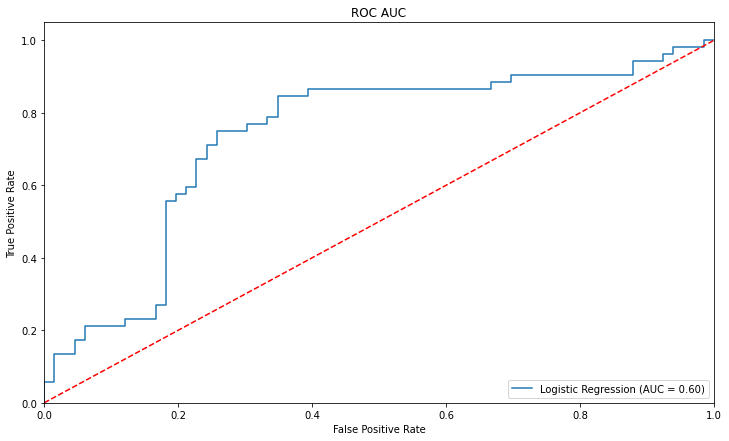

In [37]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.show()

### Cross Valid

In [42]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(max_iter=1000)
results = cross_val_score(model, X_all, y_all, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 69.153% (3.107%)


In [58]:
import statsmodels.formula.api as smf

m1 = smf.logit(
  formula='rating ~ roa + intcov_ratio + quick_ratio + intcov + bm \
    + npm + debt_assets + debt_ebitda + inv_turn + cash_ratio',
  data=train) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.518958
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 rating   No. Observations:                  354
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           10
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2364
Time:                        00:58:01   Log-Likelihood:                -183.71
converged:                       True   LL-Null:                       -240.60
Covariance Type:            nonrobust   LLR p-value:                 9.205e-20
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9175      1.249      2.335      0.020       0.469       5.366
roa             -6.2566      3.307     -1.892      0.058     -12.737       0.224
intcov_ratio     0.2063      0.053      3.865      0.000       0.102       0.311
quick_ratio     -1.0561      0.407     -2.598      0.009      -1.853      -0.259
intcov          -0.1981      0.069     -2.859      0.004      -0.334      -0.062
bm              -0.8753      0.573     -1.527      0.127      -1.999       0.248
npm             11.4260      2.468      4.630      0.000       6.589      16.263
debt_assets     -3.0235      1.227     -2.464      0.014      -5.429      -0.618
debt_ebitda     -0.0247      0.025     -0.970      0.332      -0.075       0.025
inv_turn        -0.0014      0.003     -0.485      0.628      -0.007       0.004
cash_ratio       0.4284      0.448      0.955      0.339      -0.451       1.307
================================================================================
"""

In [59]:
import statsmodels.formula.api as smf

m1 = smf.logit(
  formula='rating ~ intcov_ratio + quick_ratio + intcov + npm + debt_assets',
  data=train) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.528526
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 rating   No. Observations:                  354
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2224
Time:                        01:00:26   Log-Likelihood:                -187.10
converged:                       True   LL-Null:                       -240.60
Covariance Type:            nonrobust   LLR p-value:                 1.758e-21
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1889      0.814      1.460      0.144      -0.407       2.785
intcov_ratio     0.1832      0.049      3.771      0.000       0.088       0.278
quick_ratio     -0.6600      0.191     -3.464      0.001      -1.034      -0.287
intcov          -0.1752      0.068     -2.592      0.010      -0.308      -0.043
npm             10.7393      2.334      4.602      0.000       6.166      15.313
debt_assets     -2.6785      1.002     -2.673      0.008      -4.642      -0.715
================================================================================
"""

### Helpful for interpreting coefs

https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13
